# **Linear Regression on Bike Sharing**

<hr>

**Storyline**

RentoBikes,  a leading US bike-sharing provider, is addressing pandemic-induced revenue challenges by analyzing factors influencing bike demand. Engaging a consulting firm, they aim to predict demand post-lockdown and tailor their strategy. Data preparation involves converting numeric variables and retaining the 'yr' column for its predictive value. The model, focusing on the 'cnt' variable, aims to reveal insights into demand dynamics, guiding BoomBikes in optimizing their services for post-Covid market recovery

<hr>


<hr>

# **Stage 1: Reading and Understanding the data**

In [126]:
# Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# warning supression
import warnings
warnings.filterwarnings('ignore')

# data reading
df = pd.read_csv('D:/Python Programming/Training/Datasets/BikeSharingData.csv')

**Data Inspection**

In [127]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Check for the null values**

In [129]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# **Insights:**

1. Dropping the columns that are not required for the modelling

a. <b>Instant: This is just telling about row number, not required</b>

b. <b>Casual and Registered: no need as the dependent variable is count.</b>

c. <b>The columns 'dteday' and 'yr month' contains the same data. To eliminate the redundancy we will drop 'dteday'.</b>

**The variable 'casual' is telling us about the number of casual users who have made a booking. The column 'registered', on the other side, shows the total number of registered users who have made a booking. Finally, the 'cnt' column indicates teh total number of bike rentals, including casual and registered. So, we are going to build the model on the basis of 'cnt' columns**

In [130]:
df.drop(columns = ['instant', 'casual', 'registered', 'dteday'], inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [132]:
a = df.shape
print(f'The data presented is having {a[0]} rows and {a[1]} columns')

The data presented is having 730 rows and 12 columns


<hr>

# **Check for the correlation**

In [133]:
corr = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
corr.style.background_gradient(cmap = "Pastel1")

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


When the correlation between two features is close to  1 or -1, it indicates that there is high similarity, and dropping on the highly related features is recommended for many reasons:

1. <b>Redundancy</b>: Highly correlated columns convey the same information, resulting in repeatition of the same data. Including both may not provide any advantage and also can have collinearity issues.

2. <b>Simplicity and Interpretability</b>: A model that has less features is simple and more interpretable. Repeated features do not add value and can complicate dthe interpretation of the model's characteristic

3. <b>Avoiding Overfitting</b>: Including highly correlated columns may result in overfitting, where the model fits the training data to closely, and then struggles to generalize to the testing or unseen data


**Hence we are dropping the Atemp Columns from here**

In [134]:
# drop the atemp
df.drop(columns=['atemp'], inplace=True)

<hr>

# **Figuring out the the Categorical Data as mentioned in the storyline**

We can observe that in the dataset that there are some of the variables like 'weathersit' and 'season' have the values as 1, 2, 3, 4 which are indicating some specific values. So, we need to specify labels for them. These numerical values associated with the labels may indicate that theis some order to them, which can may not happen in this case. So, it's advisable to convert the feature value into categorical sting before going ahead

**Working with season columns**

In [135]:
df['season'] = df['season'].map({
    1: 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
})

**Working with mnth columns**

In [136]:
df['mnth'] = df['mnth'].map({
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'})

**Working with weekday columns**

In [137]:
df['weekday'] = df['weekday'].map({
    0: 'Sunday', 
    1: 'Monday', 
    2: 'Tuesday', 
    3: 'Wednesday', 
    4: 'Thursday', 
    5: 'Friday', 
    6: 'Saturday'
})

**Working with weathersit columns**

In [138]:
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})

In [139]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [140]:
df.shape

(730, 11)

<hr>

# **Step 2 - Visualising the data**

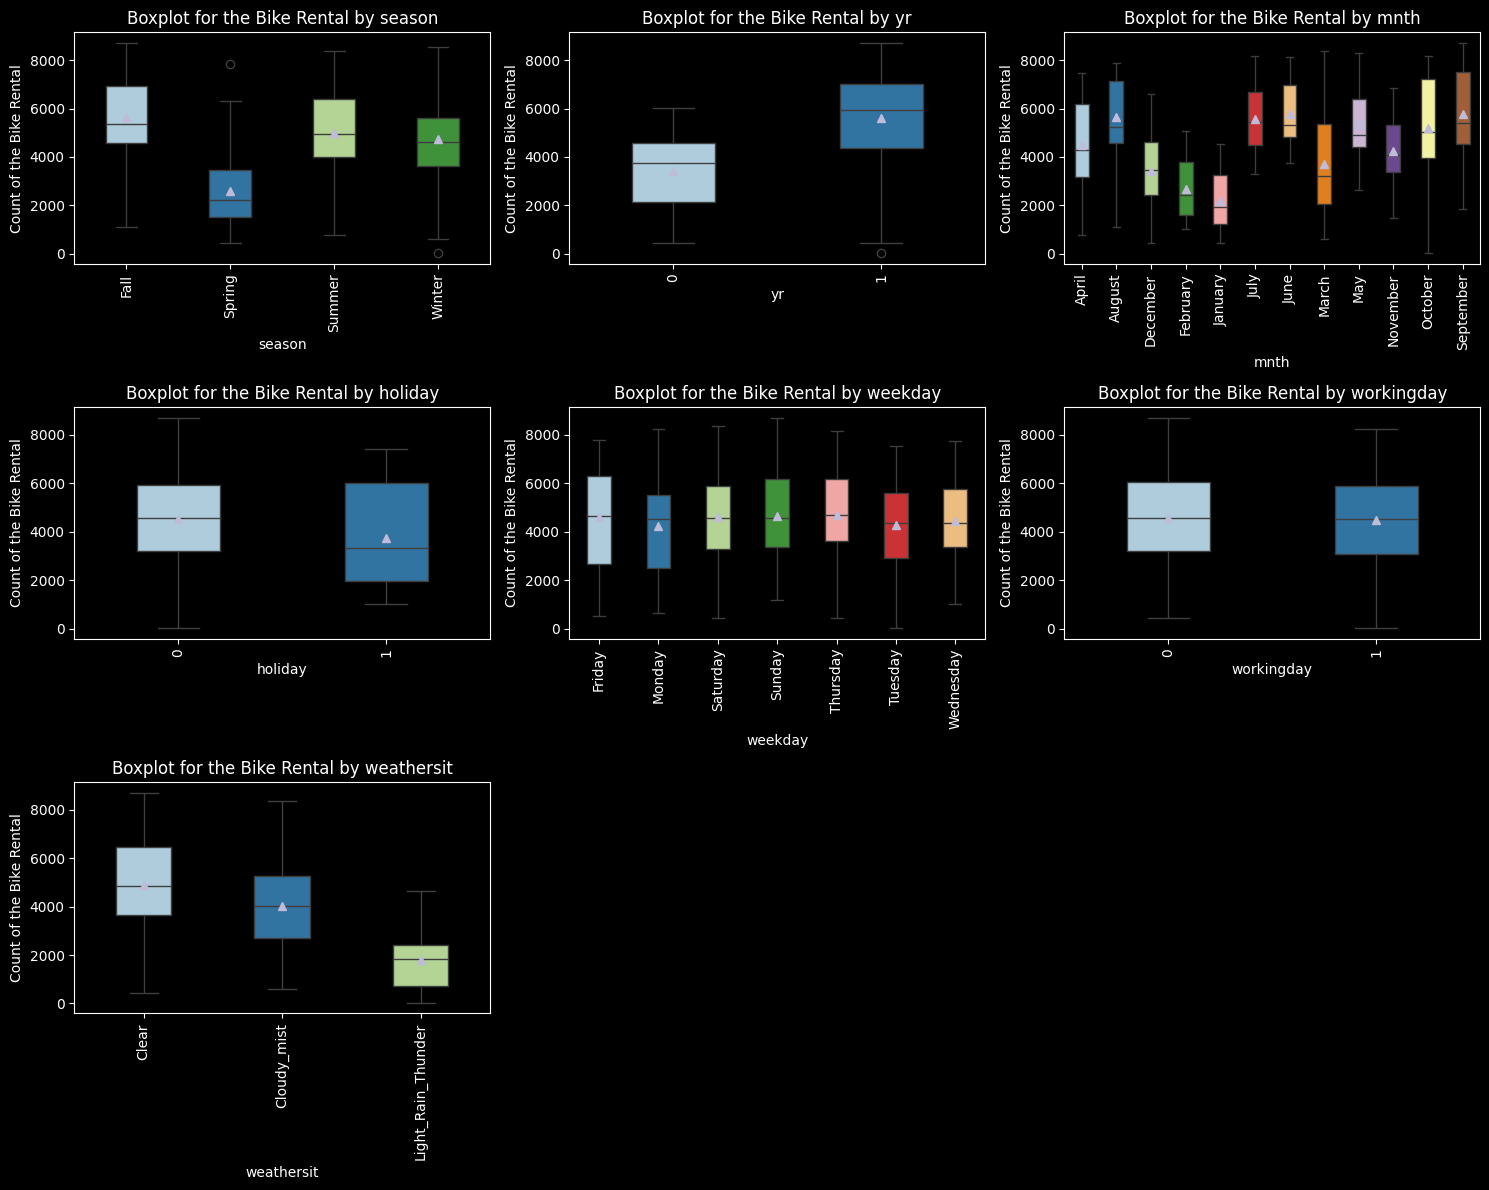

In [141]:
# the variables that are being taken in consideration
plt.style.use('dark_background')
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize= (15, 12))
for i, x in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    df_Boxplot = df[['cnt', x]].copy()
    df_Boxplot[x] = df[x].astype('category')
    
    sns.boxplot(x = x, 
                y = 'cnt', 
                data =df_Boxplot, 
                width = 0.4,
                showmeans = True, 
                palette='Paired')
    plt.title(f'Boxplot for the Bike Rental by {x}')
    plt.xlabel(x)
    plt.ylabel("Count of the Bike Rental")
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

# **Insights**

**1 .Seasonal Analysis**

* Fall has the highest average rentals, followed closely by summer

**2. Year-wise Rentals**

* 2019 sees a significant increase with the median rise of apporimately 2000 rentals compared to 2018

**3. Monthly Trend**

* September tops the montly rental count, with surrounding months showing increase in demands

**4. Holiday vs Working Day**

* Holiday generally shows that there are lower rental counts as compared to wokring days

* Holidays also exhibits greater variability in rental demands

**5. Weekday Analysis**

* Overall, there is no significant difference in rental across weekdays is observed

* Thursdays and Sunday stand out with higher variablity in rental counts as compared to other weekdays




<hr>

# **Outliers Detection**

In [142]:
# select rows from DataFrame 'df' where the season is spring and cnt is greater than 7000

# creating filter for the same
df_filter = df[(df['season']=='Spring') & (df['cnt']>7000)]

# dropping the filtered data
df.drop(df[(df.season == 'Spring') & (df.cnt > 7000)].index, inplace = True)

In [143]:
df.shape

(729, 11)

<hr>

# **Correlation of Categorical and Numerical Columns**

<Axes: >

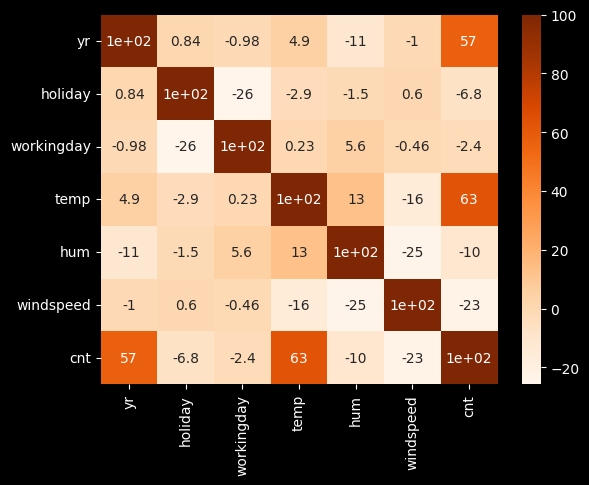

In [144]:
sns.heatmap(df.corr(numeric_only  = True)*100,cmap='Oranges', annot= True)

**The highest correlation is in `temp` and `cnt`, following the `yr` and `cnt`**

# **Pairplot to see the relationship between these columns**

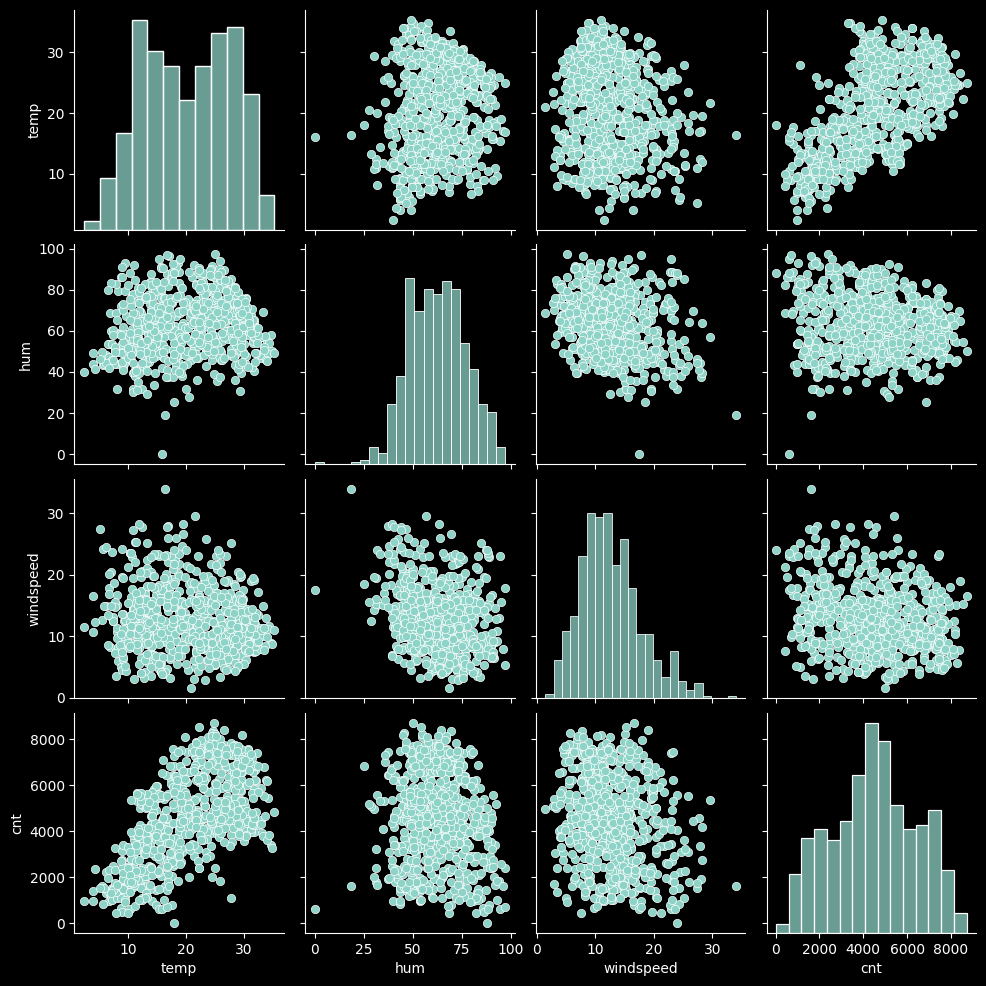

In [145]:
sns.pairplot(df, vars = ['temp', 'hum', 'windspeed', 'cnt'],palette = 'Spectral')

<hr>

# **Stage 3 : Data Preparation**

**We are having a lot of categorical data, so we need to firstly target those to convert them into the numerical data**

In [146]:
# creating dummy variables
season_data = pd.get_dummies(df['season'], drop_first=True,dtype=int)
month_data = pd.get_dummies(df['mnth'], drop_first=True,dtype=int)
weekday_data = pd.get_dummies(df['weekday'], drop_first=True,dtype=int)
weathersit_data = pd.get_dummies(df['weathersit'], drop_first=True, dtype=int)

In [147]:
# adding the indicator variables columns to the dataset, dropping original cols
df = pd.concat([df, season_data, month_data, weekday_data, weathersit_data],axis = 1)
df.drop(columns=['season', 'mnth', 'weekday', 'weathersit'], inplace = True)

In [148]:
df.shape

(729, 29)

In [149]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<hr>

# **Step 4: Data Splitting into training and testing sets**

In [150]:
from sklearn.model_selection import train_test_split

# specifying seed, for having same rows always
np.random.seed(30)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=42)

In [151]:
df_train.shape, df_test.shape

((510, 29), (219, 29))

<hr>

# **Rescaling the features**

**As there are very small integers values in our dataset, it's extremely important that we rescale the variables so that they can have a comparable scale. If we don't scale them upto a comparable scale, then some of the coefficients as obtained by fitting the regression might be very large or very small as compared to the other coefficients. This might become very disturbing at the time of model evaluation. So, we are using the scaling technique so that the coefficient obtained are all on the same scale.**

In [152]:
from sklearn.preprocessing import MinMaxScaler
obj= MinMaxScaler()

In [153]:
# applying scaler
nums_cols = ['temp', 'hum', 'windspeed']
df_train[nums_cols] = obj.fit_transform(df_train[nums_cols])

In [154]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

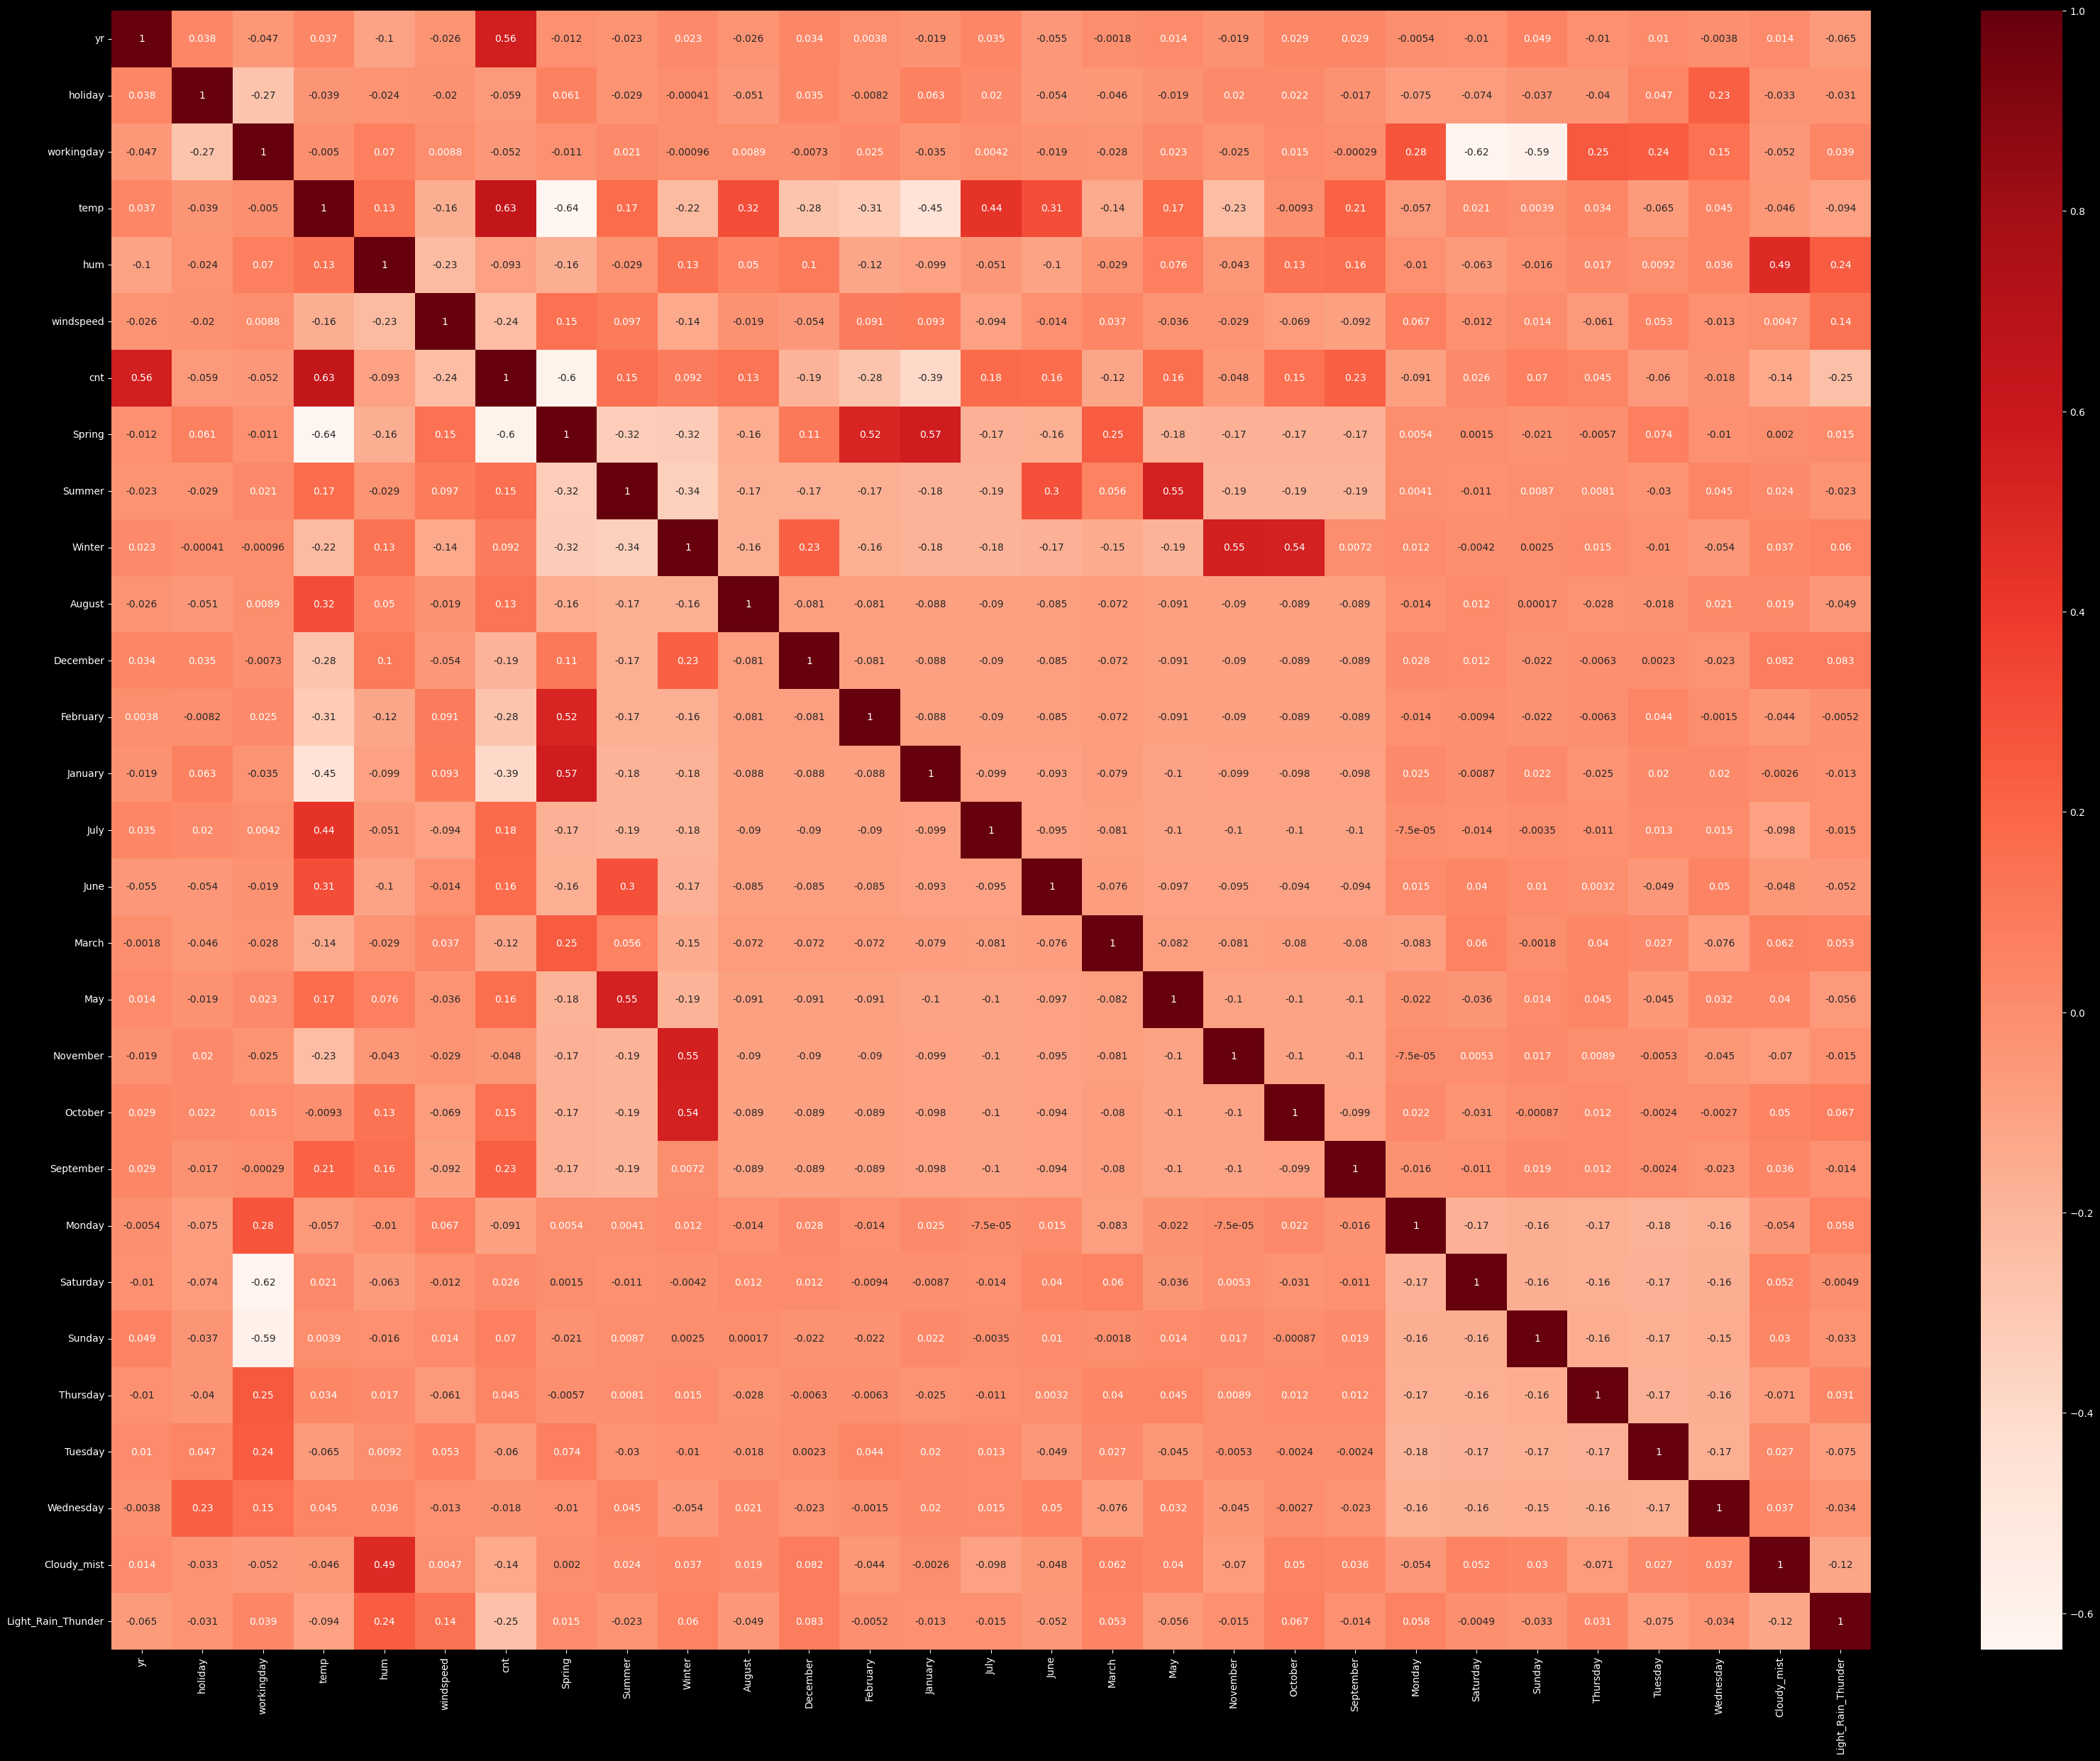

In [155]:
# checking the correlation to see what is the correlation in the data
plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = 'Reds')

**From the above figure we can find out how certain variables such as CNT, specifies Month are highly correlated**

<hr>

# **Step 5: Model Building**

**Dividing data into X and Y for building the model**

In [156]:
# seperating the target variables
y_train = df_train.pop('cnt')
x_train = df_train

In [157]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [158]:
y_train.head()

683    5445
645    5478
163    5020
360    1162
640    7572
Name: cnt, dtype: int64

**From here we are going to build a linear model that will fit the `Regression Line` through the training data using the statsmodels. In we are going to explicitly fit a constant using `sm.add_constant(x)` because if it's not performed then the library will automaticallly pass a regression line through origin, by default**

<hr>

# **Model 1: Linear Regression**

In [159]:
import statsmodels.api as sm

x_train_lm = sm.add_constant(x_train[['temp']])

**This return a dataframe having count and then temp, and after this we are going to implement the Ordinary Least of Squares (OLS) regression model using statsmodel**

In [160]:
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

const    1587.412183
temp     5435.373990
dtype: float64

In [161]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     335.1
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           7.34e-58
Time:                        15:30:47   Log-Likelihood:                -4459.3
No. Observations:                 510   AIC:                             8923.
Df Residuals:                     508   BIC:                             8931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1587.4122    176.761      8.981      0.0

**Here, if we look on to the results there are some interesting things to notice**

1. **The r2_score is 0.397 and the adjusted r2_score is 0.396**
2. **The F-test statistics is 335.1, that means our p-val is going to be very small**


**We need to add all the other variables in order to increase the r2_score that is currently 0.397**


In [162]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

<hr>

# **Model 2: Multiple Linear Regression model using all variables**

In [163]:
# adding constant colums to the dataframe
x_train_lm = sm.add_constant(x_train)

In [164]:
# fitting the multi - linear regression model
mlr2 = sm.OLS(y_train, x_train_lm).fit()

In [165]:
mlr2.params

const                 3652.396688
yr                    2009.923911
holiday               -605.567654
workingday            -110.518677
temp                  3347.440649
hum                  -1365.915250
windspeed            -1001.437960
Spring               -1233.538315
Summer                 -25.471445
Winter                 617.632599
August                -122.435967
December              -546.029328
February              -122.678216
January               -258.590584
July                  -413.946492
June                   102.552833
March                  165.837193
May                    341.599320
November              -615.187761
October                169.575650
September              475.488402
Monday                -368.864156
Saturday              -120.321689
Sunday                 -55.330188
Thursday               -17.395030
Tuesday               -178.349029
Wednesday             -207.904386
Cloudy_mist           -480.384964
Light_Rain_Thunder   -1852.852198
dtype: float64

In [166]:
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.86
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          1.03e-180
Time:                        15:30:47   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     481   BIC:                             8379.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3652.3967    925

**Here if we look to the model that is infront of us now, this model is better than the previous one**

* **The r2_score is increased to 0.860 from 0.358**
* **The adjusted_r2_score is now 0.845**

<hr>

# **Check for the Variance Inflation Factor**

**Here we are going to check for the correlation that how the variables are correlated to each other**

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [168]:
# create a dataframe and will try to put the columns on one end and on one end we will have the VIF

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [VIF(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,workingday,75.36
3,temp,46.09
4,hum,42.60
21,Saturday,15.72
22,Sunday,14.53
6,Spring,14.07
8,Winter,11.07
7,Summer,10.65
17,November,7.51
18,October,7.29


**Using this technique we got to now, that we have to remove some of the features from the dataset. In general we need only values that are having value less than 5**

**Since the VIF for some of the columns is high, I have decided to go with another method for elimination**

# **Recursive Feature Elimination (RFE)**

In [169]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [170]:
# running RFE with output numer of variables to 10
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [171]:
# assuming x_train is the feature matrix
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [172]:
rfe_table = pd.DataFrame(list(zip(x_train.columns, rfe.support_, rfe.ranking_)), columns=['Feature', 'Support', 'Rank'])

In [173]:
rfe_table.sort_values(by='Rank', ascending=True)

,Feature,Support,Rank
0,yr,True,1
25,Wednesday,True,1
24,Tuesday,True,1
20,Monday,True,1
19,September,True,1
18,October,True,1
17,November,True,1
16,May,True,1
15,March,True,1
14,June,True,1


In [174]:
selected_features = x_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'December', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [175]:
x_train_rfe = x_train[selected_features]
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,December,July,June,March,May,November,October,September,Monday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
683,1,0,0.327133,0.639330,0.327101,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
645,1,1,0.403972,0.731215,0.419004,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
163,0,0,0.717562,0.509660,0.708724,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
360,0,0,0.331287,0.785745,0.415925,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
640,1,0,0.745598,0.817947,0.110593,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


# **Model 3: Using RFE**

In [176]:
# adding constant
x_train_lm = sm.add_constant(x_train_rfe)

# fitting OLS
mlr3 = sm.OLS(y_train, x_train_lm).fit()

print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          9.59e-189
Time:                        15:30:47   Log-Likelihood:                -4100.0
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     489   BIC:                             8331.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3454.4217    291

**R2_Score is: 0.849**

**Adjusted R2_score is 0.845**

<hr>

**Now we will eliminate all the columns with high VIF values**

**Iteration 1 for VIF**

In [177]:

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [VIF(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,hum,25.80
2,temp,21.02
6,Winter,7.90
4,windspeed,5.24
12,November,3.96
13,October,3.93
5,Spring,2.89
18,Cloudy_mist,2.21
7,December,2.11
0,yr,2.10


In [178]:
x_train_rfe = x_train_rfe.drop('hum', axis = 1)

**Iteration 2 for VIF**

In [179]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [VIF(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,8.35
5,Winter,7.62
3,windspeed,5.23
12,October,3.93
11,November,3.89
0,yr,2.09
6,December,2.05
4,Spring,1.95
7,July,1.92
13,September,1.71


In [180]:
x_train_rfe = x_train_rfe.drop('temp', axis = 1)

**Iteration 3 for VIF**

In [181]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [VIF(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
4,Winter,7.62
10,November,3.88
11,October,3.82
2,windspeed,3.64
5,December,2.04
0,yr,1.96
3,Spring,1.89
16,Cloudy_mist,1.55
12,September,1.37
15,Wednesday,1.30


In [183]:
x_train_rfe = x_train_rfe.drop('Winter', axis = 1)

**Iteration 4 for VIF**

In [184]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [VIF(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,windspeed,3.63
0,yr,1.96
3,Spring,1.79
15,Cloudy_mist,1.55
14,Wednesday,1.30
13,Tuesday,1.29
12,Monday,1.27
10,October,1.26
8,May,1.26
9,November,1.23


In [186]:
x_train_lm = sm.add_constant(x_train_rfe)

# OLS
mlr_final = sm.OLS(y_train, x_train_lm).fit()

# print
print(mlr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          2.47e-167
Time:                        15:34:03   Log-Likelihood:                -4159.4
No. Observations:                 510   AIC:                             8355.
Df Residuals:                     492   BIC:                             8431.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4691.6570    142

In [188]:
y_train_pred = mlr_final.predict(x_train_lm)

Text(0.5, 0, 'Errors')

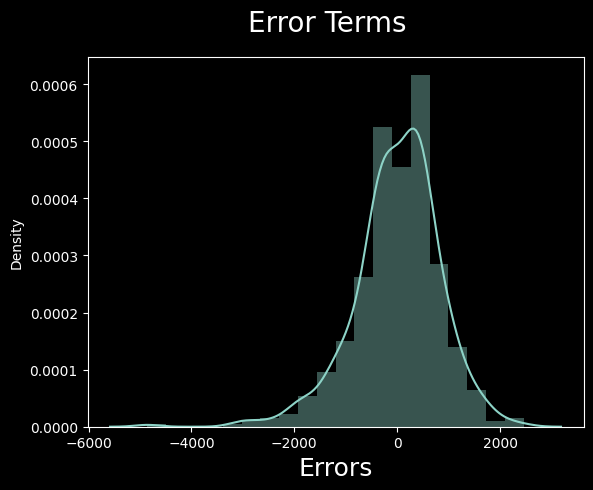

In [189]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

**Now that we have fitted the model and checked the normality of error terms, it’s time to go ahead and make predictions using the final**

In [192]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
469,1,0,1,24.873347,50.7917,15.083643,7132,0,1,0,...,0,0,1,0,0,0,0,0,0,0
148,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,1,13.085847,62.3750,11.833339,3331,0,0,1,...,1,0,0,0,0,0,1,0,0,0
355,0,0,0,17.356653,75.7500,3.167425,3068,1,0,0,...,0,0,0,1,0,0,0,0,1,0
516,1,0,0,26.820847,75.5417,15.916721,4127,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,0,1,18.791653,83.0833,17.292164,2914,0,0,1,...,0,0,0,0,0,1,0,0,1,0
533,1,0,1,23.301653,77.7917,11.707982,5099,0,1,0,...,0,0,0,0,0,0,1,0,1,0
559,1,0,0,28.836653,69.9167,9.626493,6969,0,0,0,...,0,0,0,0,1,0,0,0,1,0
137,0,0,1,22.550000,87.0000,13.499964,3855,0,1,0,...,0,0,0,0,0,0,0,0,1,0
